In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib
import shap
from PIL import Image
import PIL

%matplotlib inline

c:\Users\bluesense\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("Copy of Copy of AccidentReports.csv")
df.isna().sum()

DISTRICTNAME                     0
UNITNAME                         0
Crime_No                         0
Year                             0
RI                               0
Noofvehicle_involved             0
Accident_Classification          2
Accident_Spot                    1
Accident_Location                3
Accident_SubLocation             1
Accident_SpotB              125077
Main_Cause                       2
Hit_Run                          3
Severity                         2
Collision_Type                   1
Junction_Control                 1
Road_Character                   4
Road_Type                        2
Surface_Type                     2
Surface_Condition                1
Road_Condition                   3
Weather                          1
Lane_Type                   239253
Road_Markings               271601
Spot_Conditions             248412
Side_Walk                   254704
RoadJunction                301761
Collision_TypeB             125075
Accident_Road       

In [3]:
df['Road_Condition'].value_counts()

Road_Condition
Not Applicable                  220980
No influence on accident         64621
Pot holed                         5276
Construction Work / Material      4408
Engineering Defect of Road        3735
Drainage Ditch                    2738
Name: count, dtype: int64

In [3]:
df.dtypes

DISTRICTNAME                 object
UNITNAME                     object
Crime_No                      int64
Year                          int64
RI                            int64
Noofvehicle_involved          int64
Accident_Classification      object
Accident_Spot                object
Accident_Location            object
Accident_SubLocation         object
Accident_SpotB               object
Main_Cause                   object
Hit_Run                      object
Severity                     object
Collision_Type               object
Junction_Control             object
Road_Character               object
Road_Type                    object
Surface_Type                 object
Surface_Condition            object
Road_Condition               object
Weather                      object
Lane_Type                    object
Road_Markings                object
Spot_Conditions              object
Side_Walk                    object
RoadJunction                float64
Collision_TypeB             

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301761 entries, 0 to 301760
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DISTRICTNAME              301761 non-null  object 
 1   UNITNAME                  301761 non-null  object 
 2   Crime_No                  301761 non-null  int64  
 3   Year                      301761 non-null  int64  
 4   RI                        301761 non-null  int64  
 5   Noofvehicle_involved      301761 non-null  int64  
 6   Accident_Classification   301759 non-null  object 
 7   Accident_Spot             301760 non-null  object 
 8   Accident_Location         301758 non-null  object 
 9   Accident_SubLocation      301760 non-null  object 
 10  Accident_SpotB            176684 non-null  object 
 11  Main_Cause                301759 non-null  object 
 12  Hit_Run                   301758 non-null  object 
 13  Severity                  301759 non-null  o

Severity
Grievous Injury    128846
Simple Injury       70954
Fatal               68604
Damage Only         24607
Not Applicable       8741
BUDDHISTS               2
ACHARI                  1
Roof                    1
Father                  1
MEDARA                  1
Others                  1
Name: count, dtype: int64


<Axes: xlabel='Severity'>

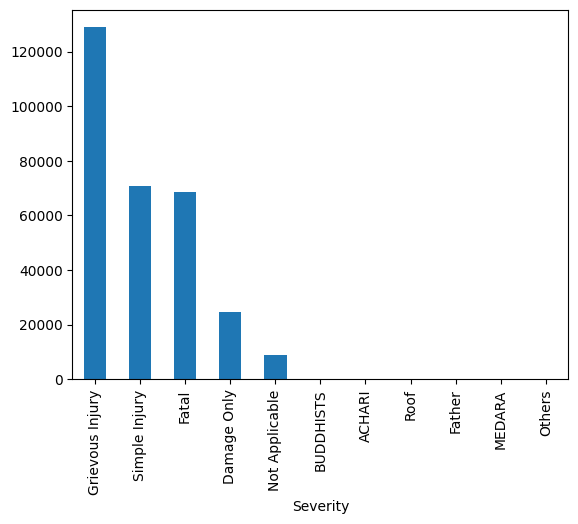

In [5]:
print(df['Severity'].value_counts())
df['Severity'].value_counts().plot(kind='bar')

<Axes: xlabel='Weather'>

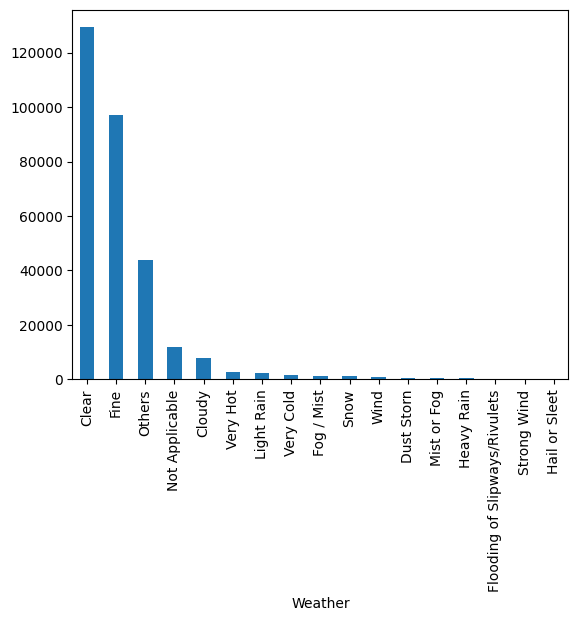

In [6]:
df['Weather'].value_counts().plot(kind='bar')

Lane_Type
DualLane        25007
Others          17293
SingleLane      14628
FourLane         4511
SixLane           831
Intermediate      238
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

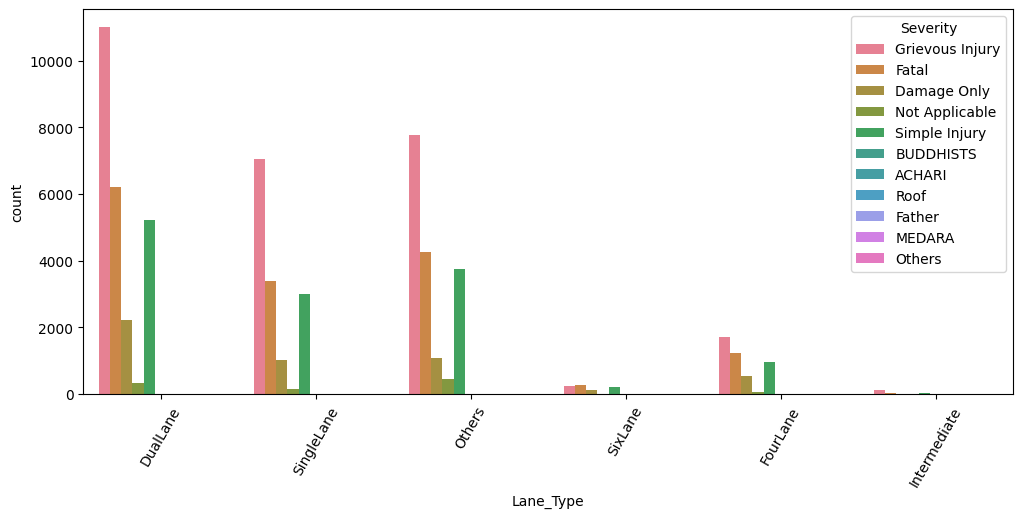

In [7]:
print(df['Lane_Type'].value_counts())

plt.figure(figsize=(12,5))
sns.countplot(x='Lane_Type', hue='Severity', data=df)
plt.xlabel('Lane_Type')
plt.xticks(rotation=60)
plt.show

In [8]:
df.isnull().sum()

DISTRICTNAME                     0
UNITNAME                         0
Crime_No                         0
Year                             0
RI                               0
Noofvehicle_involved             0
Accident_Classification          2
Accident_Spot                    1
Accident_Location                3
Accident_SubLocation             1
Accident_SpotB              125077
Main_Cause                       2
Hit_Run                          3
Severity                         2
Collision_Type                   1
Junction_Control                 1
Road_Character                   4
Road_Type                        2
Surface_Type                     2
Surface_Condition                1
Road_Condition                   3
Weather                          1
Lane_Type                   239253
Road_Markings               271601
Spot_Conditions             248412
Side_Walk                   254704
RoadJunction                301761
Collision_TypeB             125075
Accident_Road       

In [9]:
features = ['DISTRICTNAME', 'UNITNAME', 'Crime_No', 'Year', 'RI',
       'Noofvehicle_involved', 'Accident_Classification', 'Accident_Spot',
       'Accident_Location', 'Accident_SubLocation', 'Accident_SpotB',
       'Main_Cause', 'Hit_Run', 'Collision_Type',
       'Junction_Control', 'Road_Character', 'Road_Type', 'Surface_Type',
       'Surface_Condition', 'Road_Condition', 'Weather', 'Lane_Type',
       'Road_Markings', 'Spot_Conditions', 'Side_Walk', 'RoadJunction',
       'Collision_TypeB', 'Accident_Road', 'Landmark_first', 'landmark_second',
       'Distance_LandMark_First', 'Distance_LandMark_Second',
       'Accident_Description', 'Latitude', 'Longitude']
len(features)

35

In [10]:
featureset_df = df.drop("Severity",axis=1)
target = df['Severity']

In [11]:
feature_df = featureset_df.copy()

In [12]:
feature_df['Accident_SpotB'] = feature_df['Accident_SpotB'].fillna('Unknown')
feature_df['Lane_Type'] = feature_df['Lane_Type'].fillna('Unknown')
feature_df['Road_Markings'] = feature_df['Road_Markings'].fillna('Unknown')
feature_df['Spot_Conditions'] = feature_df['Spot_Conditions'].fillna('Unknown')
feature_df['Side_Walk'] = feature_df['Side_Walk'].fillna('Unknown')
feature_df['RoadJunction'] = feature_df['RoadJunction'].fillna('Unknown')
feature_df['Collision_TypeB'] = feature_df['Collision_TypeB'].fillna('Unknown')
feature_df['Accident_Road'] = feature_df['Accident_Road'].fillna('Unknown')
feature_df['Landmark_first'] = feature_df['Landmark_first'].fillna('Unknown')
feature_df['landmark_second'] = feature_df['landmark_second'].fillna('Unknown')
feature_df['Distance_LandMark_First'] = feature_df['Distance_LandMark_First'].fillna('Unknown')
feature_df['Distance_LandMark_Second'] = feature_df['Distance_LandMark_Second'].fillna('Unknown')
feature_df['Accident_Description'] = feature_df['Accident_Description'].fillna('Unknown')


In [13]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301761 entries, 0 to 301760
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DISTRICTNAME              301761 non-null  object 
 1   UNITNAME                  301761 non-null  object 
 2   Crime_No                  301761 non-null  int64  
 3   Year                      301761 non-null  int64  
 4   RI                        301761 non-null  int64  
 5   Noofvehicle_involved      301761 non-null  int64  
 6   Accident_Classification   301759 non-null  object 
 7   Accident_Spot             301760 non-null  object 
 8   Accident_Location         301758 non-null  object 
 9   Accident_SubLocation      301760 non-null  object 
 10  Accident_SpotB            301761 non-null  object 
 11  Main_Cause                301759 non-null  object 
 12  Hit_Run                   301758 non-null  object 
 13  Collision_Type            301760 non-null  o

In [14]:
feature_df[features] = feature_df[features].iloc[:60000]

In [15]:
X = feature_df[features].iloc[:60000]
y = target.iloc[:60000]


In [16]:
# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(60000, 123080)

In [17]:
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['BUDDHISTS' 'Damage Only' 'Fatal' 'Grievous Injury' 'Not Applicable'
 'Simple Injury' nan]


In [ ]:
mi_calc = mutual_info_classif(encoded_df, y_en, random_state=42)

In [ ]:
mi_df = pd.DataFrame({'Columns':encoded_df.columns, 'MI_score':mi_calc})
mi_df.sort_values(by='MI_score',ascending=False).head(15)

In [18]:
# feature seleciton method using chi2 for categorical output, categorical input
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)
X_new.shape
cols = fs.get_feature_names_out()

In [19]:
fs_df = pd.DataFrame(X_new, columns=cols)

In [20]:
pca = PCA(n_components=3)
pca.fit(encoded_df)

X_pca = pca.transform(encoded_df)

# 3 components PCA algorithm
components = pca.components_

pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
pca_df.var()

PC1    2.194085e+28
PC2    1.411298e+03
PC3    2.019230e+01
dtype: float64

In [96]:
# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(fs_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)
# predicting on test data
predics = rf.predict(X_tst)

In [97]:
# train score 
rf.score(X_trn, y_trn)

0.7664375

In [98]:
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.42      0.14      0.21      1119
           1       0.47      0.25      0.32      2678
           2       0.57      0.85      0.68      5861
           3       0.52      0.36      0.43      2185
           4       0.17      0.03      0.04       157

    accuracy                           0.55     12000
   macro avg       0.43      0.32      0.34     12000
weighted avg       0.52      0.55      0.50     12000



In [99]:
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)


0.5029117715473864


Streamlit


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301761 entries, 0 to 301760
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DISTRICTNAME              301761 non-null  object 
 1   UNITNAME                  301761 non-null  object 
 2   Crime_No                  301761 non-null  int64  
 3   Year                      301761 non-null  int64  
 4   RI                        301761 non-null  int64  
 5   Noofvehicle_involved      301761 non-null  int64  
 6   Accident_Classification   301759 non-null  object 
 7   Accident_Spot             301760 non-null  object 
 8   Accident_Location         301758 non-null  object 
 9   Accident_SubLocation      301760 non-null  object 
 10  Accident_SpotB            176684 non-null  object 
 11  Main_Cause                301759 non-null  object 
 12  Hit_Run                   301758 non-null  object 
 13  Severity                  301761 non-null  o

In [146]:
# selecting 7 categorical features from the dataframe
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_fea_df = feature_df[['Accident_Classification','Accident_Spot','Accident_Location']]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

# save the ordinal encoder object for inference pipeline
joblib.dump(oencoder2, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [159]:
s_final_df = pd.concat([feature_df['Noofvehicle_involved'],encoded_df3], axis=1)
s_final_df = s_final_df.iloc[:60000]

In [161]:


# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X_trn, X_tst, y_trn, y_tst = train_test_split(fs_df, y_en, test_size=0.2, random_state=42)

Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_trn, y_trn)
preds = Gradient_model.predict(X_tst)
print(mean_absolute_error(y_tst, preds))
r2_score(y_tst, Gradient_model.predict(X_tst))
print(Gradient_model.score(X_trn,y_trn))

f1score = f1_score(y_tst,preds, average='weighted')
print(f1score)

rf.fit(X_trn,y_trn)


In [176]:
feature_df['Accident_Classification'].value_counts()

Accident_Classification
Road Accidents             56556
Not Applicable              2821
Rail Road Accidents          549
Other Railway Accidents       74
Name: count, dtype: int64

In [177]:
feature_df['Accident_Spot'].unique()

array(['Bottleneck', 'Bridge', 'Cross roads', 'Not Applicable',
       'More than four arms', 'Road hump or Rumble strips', 'Junction',
       'Curves', 'Other', 'T Junction', 'Offset', 'Narrow road',
       'Culvert', 'Staggered junction', 'Y Junction', 'Circle',
       'Railway crossing', 'Rail Crossing manned',
       'Round about or Circle', 'Rail Crossing Unmanned', nan],
      dtype=object)

In [178]:
feature_df['Accident_Location'].unique()

array(['Rural Areas', 'Villages settlement', 'City/Town',
       'Not Applicable', nan], dtype=object)

In [168]:
feature_df['Noofvehicle_involved'].value_counts()

Noofvehicle_involved
2.0     31357
1.0     26963
3.0      1350
4.0       234
5.0        55
6.0        19
7.0        11
8.0         5
9.0         2
10.0        2
49.0        1
21.0        1
Name: count, dtype: int64

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import folium

#X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# Load past crime data
crime_data = pd.read_csv('Copy of Copy of AccidentReports.csv')

# Select relevant features for clustering
X = crime_data[['Latitude', 'Longitude']]


X_trn2, X_tst2  = train_test_split(X, test_size=0.2, random_state=42)

# Initialize K-Means model with desired number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X_trn2)

# Define new_data for future crime locations (sample data)
#new_data = pd.DataFrame({'Latitude': [34.05, 34.06, 34.07], 'Longitude': [-118.25, -118.24, -118.26]})

# Predict clusters for future crime locations
future_crime_locations = kmeans.predict(X_tst2)

# Create a map centered at the mean latitude and longitude of the crime data
map_center = [X['Latitude'].mean(), X['Longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=12)

# Add past crime locations to the map
for index, row in X.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['CrimeType']).add_to(crime_map)

# Add future crime locations to the map
for index, row in new_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup='Future Crime Location').add_to(crime_map)

# Display the map
crime_map
